<a href="https://colab.research.google.com/github/mohammedelbakkali/traitement_signaux/blob/main/traitement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ce fichier contient tous les algorithmes que nous avons développés avec des tests.


*    Application des filtres (Wiener ou EMA)


* Application VMD
* Séparation des resources par FastICA ou JADE
* Faire un test de méthode de soustraction (SignalHealthy - SignalFault = SignalDeDéfaut)

## **! N'oublie pas d'importer le drive.**




In [ ]:
import sys
sys.path.insert(0,"/content/drive/MyDrive/traitement_signaux/functions")

## Filtre de Wiener (Wiener Filter)

**Principe :**  
Le filtre de Wiener est un filtre optimal utilisé pour restaurer des signaux corrompus par le bruit. Il cherche à minimiser l'erreur quadratique moyenne entre le signal réel et le signal filtré. Il repose sur des hypothèses statistiques sur le bruit et le signal.

**Formule :**  
Le filtre de Wiener peut être exprimé par :
$$
H(f) = \frac{S_{xx}(f)}{S_{xx}(f) + S_{nn}(f)}
$$

où  $$ S_{xx}(f) $$  est la puissance spectrale du signal et $$ S_{nn}(f) $$ est celle du bruit.

**Applications :**  
- Restauration d'image.
- Filtrage des signaux audio et vidéo pour réduire le bruit.
## Exemple :


```
from filtres import filtre  
filtre("wiener","nom de fichier","nom de colonne")
```



---





## EMA (Exponential Moving Average)

**Principe :**  
La moyenne mobile exponentielle (EMA) est un indicateur pour lisser les données en donnant plus de poids aux données récentes.

**Formule :**  
La formule de l'EMA est :
$$
 EMA(t) = \alpha \times Y(t) + (1 - \alpha) \times EMA(t - 1)
$$
où  $$ \alpha $$ est le coefficient de lissage.

**Applications :**  
- Analyse financière (suivi des tendances).
- Lissage de signaux dans les systèmes de contrôle.



```
from filtres import filtre  
filtre("ema","nom de fichier","nom de colonne")
```


10000


array([0.00472254, 0.00450678, 0.00434518, ..., 0.006821  , 0.00678833,
       0.00677306])

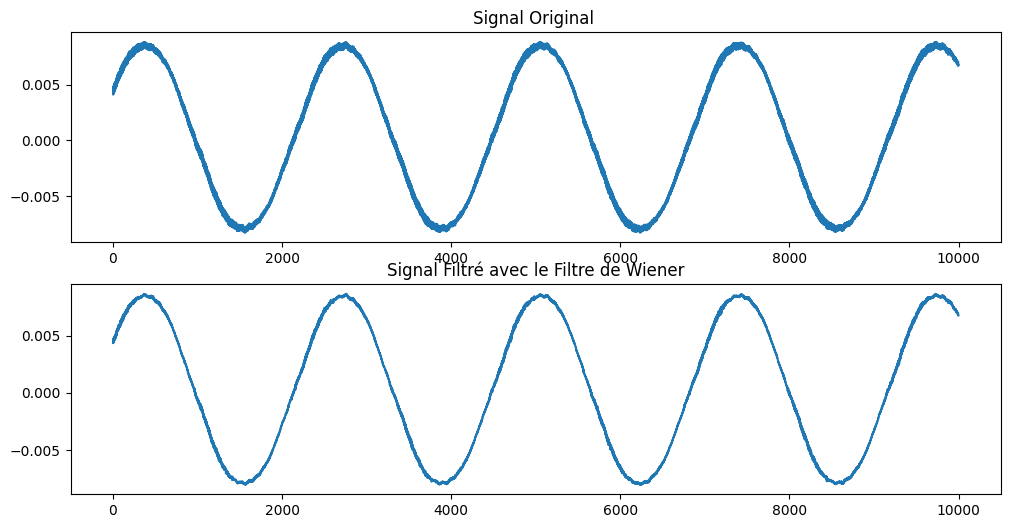

In [ ]:
from filtres import filtre
filtre("wiener","CE_fault_031.csv","cur_1")

## VMD (Variational Mode Decomposition)

**Principe :**  
VMD est une méthode de décomposition de signaux non-stationnaires en plusieurs modes en minimisant une fonction variationnelle. Elle garantit des résultats stables et rapides.

**Étapes principales :**  
1. Décomposition du signal en plusieurs sous-bandes (modes).
2. Chaque mode est associé à une bande de fréquences spécifique.

**Applications :**  
- Analyse vibratoire des machines.
- Traitement d'images.




---




**# Application de l'algorithme VMD sur un signal mixé de trois signaux sinusoïdaux.**

# Équations des Signaux

Les équations des signaux sont :

1.
$$
ss1(t) = \sin(150 \cdot 2 \pi t)
$$

2.
$$
ss2(t) = \sin(50 \cdot 2 \pi t)
$$

3.
$$
ss3(t) = \sin(450 \cdot 2 \pi t)
$$
Mix
4.
$$
 smx = ss1 + ss2 + ss3
$$


In [ ]:
import VMD_lib

import numpy as np
import matplotlib.pyplot as plt
from fft_lib import fft


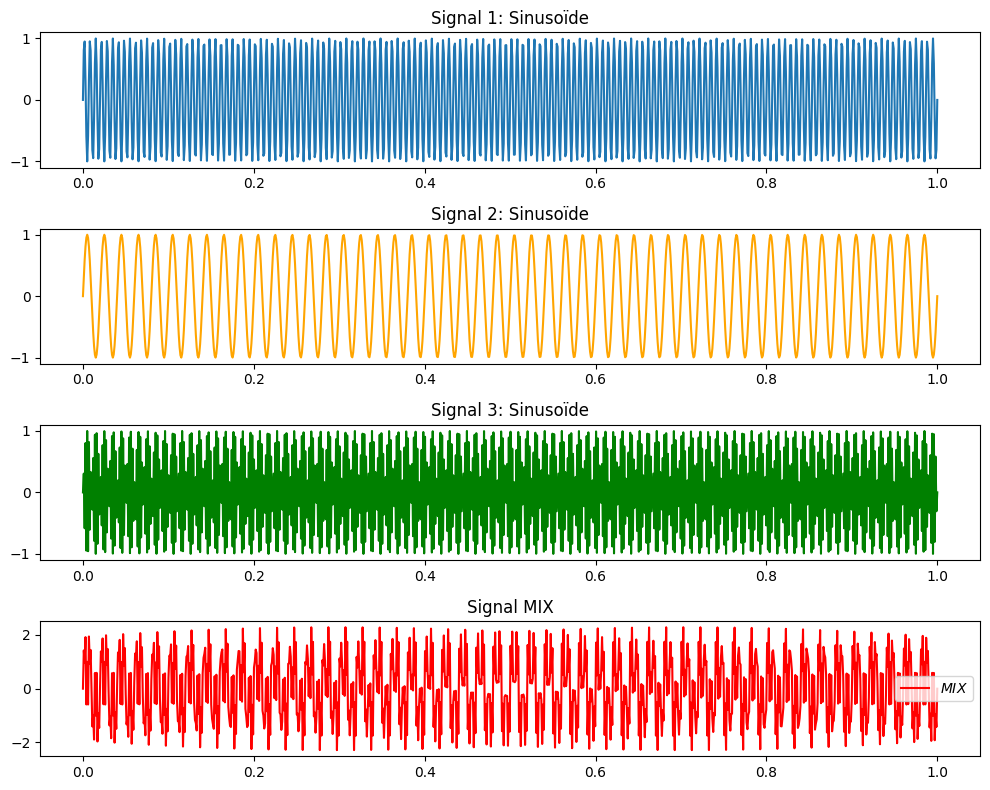

In [ ]:

frequence_echantillonnage = 1000
T=1
t = np.linspace(0,T,T*frequence_echantillonnage);

ss1 = np.sin(150*2 * np.pi * t)
ss2 = np.sin(50*2 * np.pi * t)
ss3 = np.sin(450*2 * np.pi * t)
smx = ss1 + ss2 + ss3
s4 = ((np.mod(t, 23) - 11) / 9) ** 5

# Créer les graphiques
plt.figure(figsize=(10, 8))

# Plot de s1(t)
plt.subplot(4, 1, 1)
plt.plot(t, ss1)
plt.title('Signal 1: Sinusoïde')

# Plot de s2(t)
plt.subplot(4, 1, 2)
plt.plot(t, ss2, color='orange')
plt.title('Signal 2: Sinusoïde')

# Plot de s3(t)
plt.subplot(4, 1, 3)
plt.plot(t, ss3,  color='green')
plt.title('Signal 3: Sinusoïde')

# Plot de s4(t)
plt.subplot(4, 1, 4)
plt.plot(t, smx, label=r'$ MIX $', color='red')
plt.title('Signal MIX')
plt.legend()


plt.tight_layout()
plt.show()


# L'application du VMD
# Paramètres de Configuration
$$
\text{Fréquence d'échantillonnage en Hz:} \\
fs = 1000 \text{ Hz}
$$

$$
\text{Facteur de pénalité pour la régularisation:} \\
\alpha = 2000
$$

$$
\text{Tolérance Lagrangienne:} \\
\tau = 0
$$

$$
\text{Nombre de modes à extraire:} \\
K = 3
$$

$$
\text{Pas de composante DC:} \\
DC = \text{False}
$$

$$
\text{Initialisation des fréquences:} \\
\text{init} = 1
$$

$$
\text{Tolérance pour la convergence:} \\
\text{tol} = 1 \times 10^{-7}
$$


(3, 1000) (1000,)


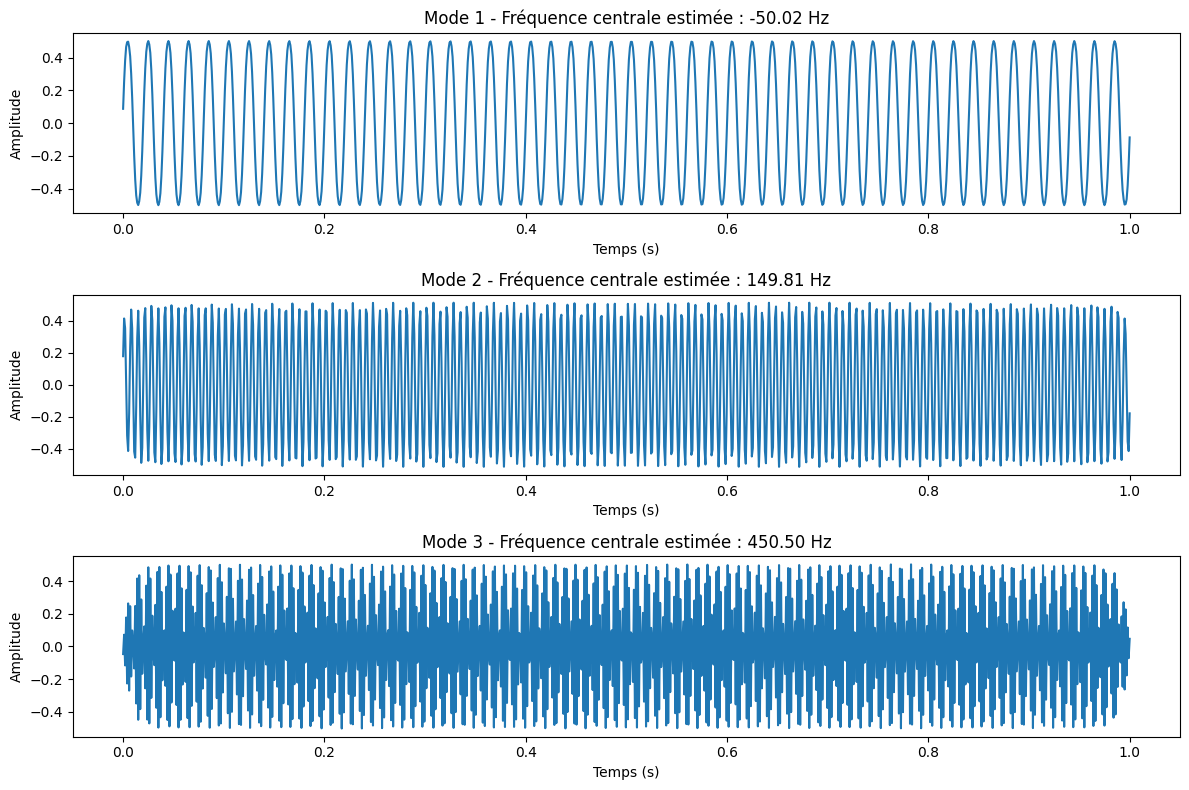

In [ ]:

fs = 1000  # Fréquence d'échantillonnage en Hz
alpha = 2000       # Facteur de pénalité pour la régularisation
tau = 0.            # Tolérance Lagrangienne
K = 3             # Nombre de modes à extraire
DC = False          # Pas de composante DC
init = 1            # Initialisation des fréquences
tol = 1e-7
u, omega = VMD_lib.VMD(smx, alpha, tau, K, DC, init, tol , fs)
print(u.shape, t.shape)
# Downsample the time vector 't' to match the length of 'u'
t_downsampled = np.linspace(0, T, u.shape[1])
# Affichage des modes extraits
plt.figure(figsize=(12, 8))
for k in range(K):
    plt.subplot(K, 1, k+1)
    plt.plot(t_downsampled, u[k, :])
    plt.title(f"Mode {k+1} - Fréquence centrale estimée : {omega[k]*fs:.2f} Hz")
    plt.xlabel("Temps (s)")
    plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()


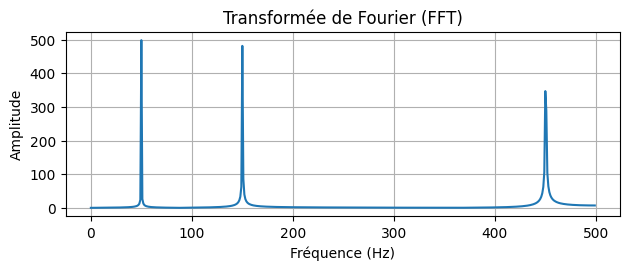

In [ ]:
fft(smx,1000)

# **Test des algorithmes sur notre dataset**


1.   Application des filtres (Wiener ou EMA)
2.   Application VMD
3.   Séparation des resources par FastICA ou JADE
4.   Faire un test de méthode de soustraction (SignalHealthy - SignalFault = SignalDeDéfaut)




76800


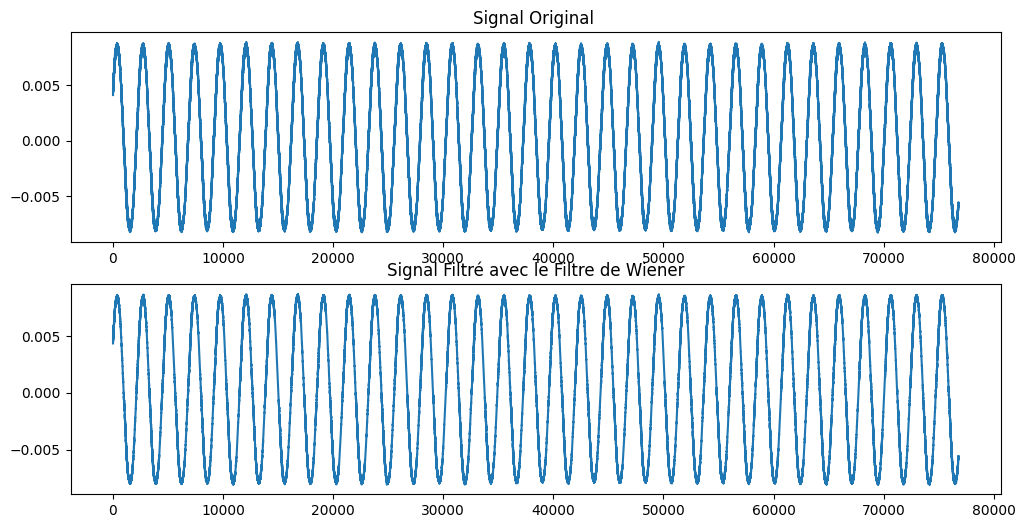

In [ ]:
signal_ce_fault31 = filtre("wiener","CE_fault_031.csv","cur_1")

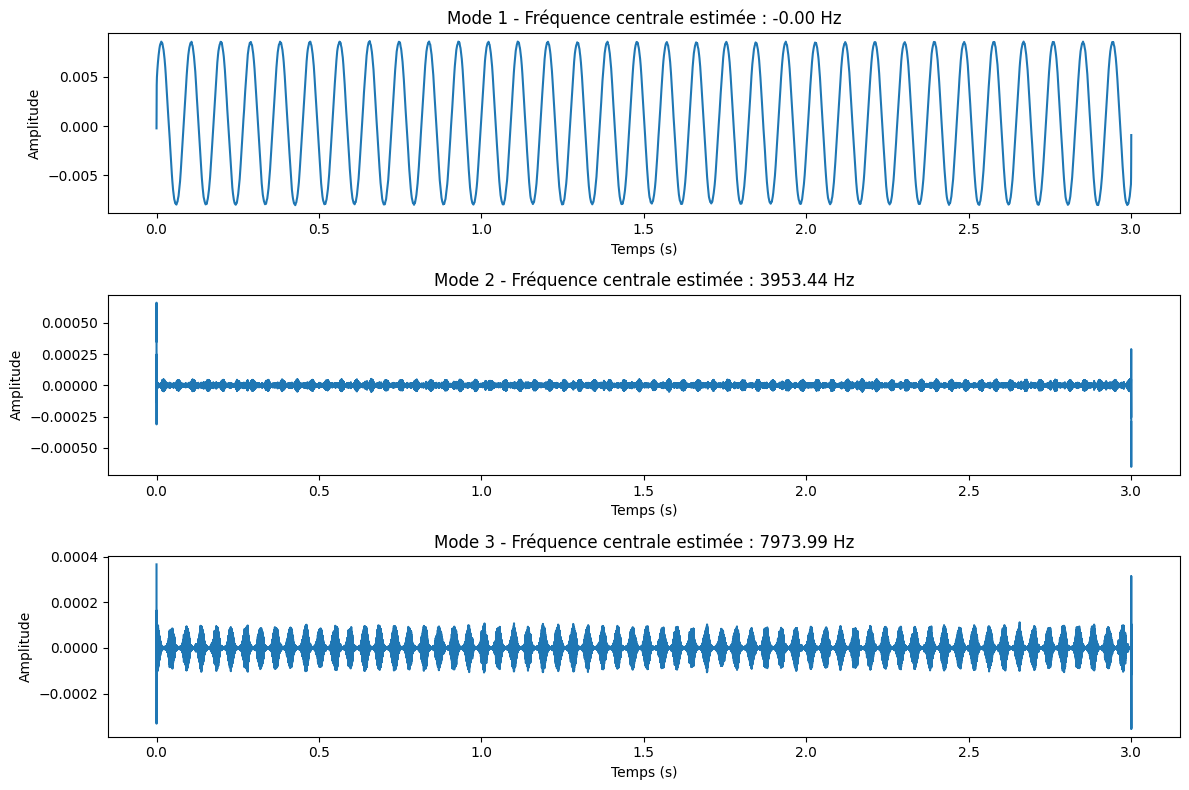

In [ ]:
import pandas as pd
# Charger le fichier CSV contenant le signal
#file_path = '/content/drive/MyDrive/traitement_signaux/data_set/CE_fault_033.csv'  # Remplacez par le chemin vers votre fichier
#data = pd.read_csv(file_path, sep=';', decimal=',')
# Assurez-vous que le fichier contient une colonne 'cur_1' avec les données du signal
#signal = data['cur_1']


votre_signal = signal_ce_fault31  # Par exemple, utiliser le signal précédent ou charger le vôtre
# Application de la VMD sur votre signal
fs = 25600  # Fréquence d'échantillonnage en Hz
alpha = 2000       # Facteur de pénalité pour la régularisation
tau = 0.            # Tolérance Lagrangienne
K = 3             # Nombre de modes à extraire
DC = False          # Pas de composante DC
init = 1            # Initialisation des fréquences
tol = 1e-7

# Calculer le tableau de temps en secondes
N = len(signal_ce_fault31)  # Nombre de points dans le signal
t = np.linspace(0, N / fs, N)  # Temps correspondant à chaque échantillon


u_votre_signal, omega_votre_signal = VMD_lib.VMD(votre_signal, alpha, tau, K, DC, init, tol ,fs)

# Affichage des modes extraits de votre signal
plt.figure(figsize=(12, 8))
for k in range(K):
    plt.subplot(K, 1, k+1)
    plt.plot(t, u_votre_signal[k, :])
    plt.title(f"Mode {k+1} - Fréquence centrale estimée : {omega_votre_signal[k]*fs:.2f} Hz")
    plt.xlabel("Temps (s)")
    plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

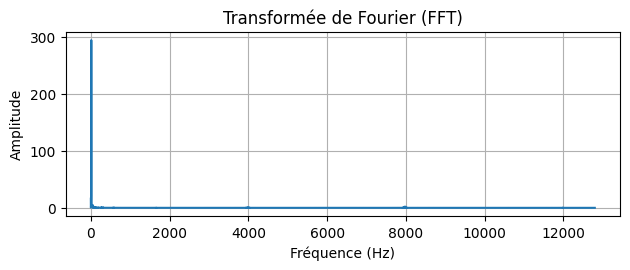

In [ ]:
fft(votre_signal,25600)

# Test les filtres sur les vibrations

In [ ]:
from filtres import filtre

76800


array([9.03333333e-05, 1.28000000e-04, 1.20333333e-04, ...,
       1.20333333e-04, 1.45000000e-04, 8.36666667e-05])

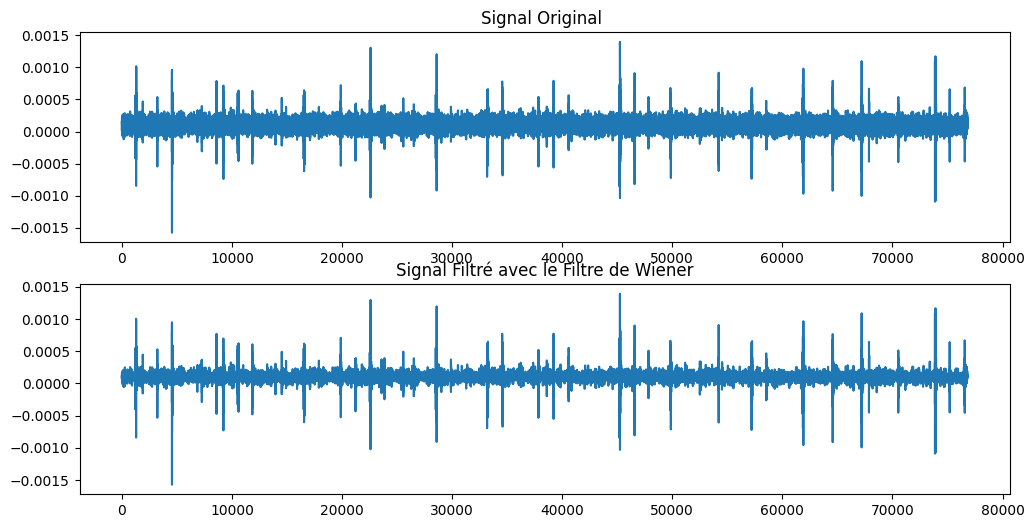

In [ ]:
filtre("wiener","CE_fault_033.csv","vib_0")

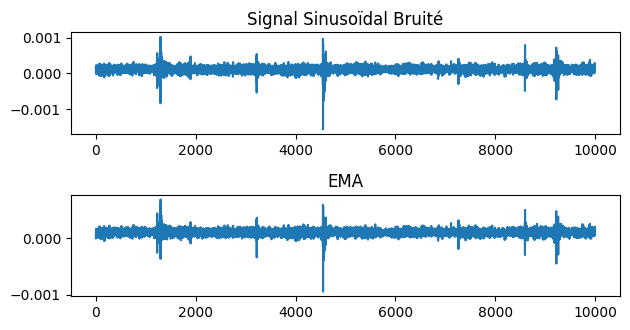

In [ ]:
filtre("ema","CE_fault_033.csv","vib_0")

# **. FastICA (Fast Independent Component Analysis)**
## **Principe :**
FastICA est un algorithme utilisé pour effectuer l'analyse en composantes indépendantes (ICA), qui est une technique de séparation aveugle des sources (Blind Source Separation - BSS). L'objectif est de séparer un signal mixte en ses composantes indépendantes, en supposant que les signaux sources sont statistiquement indépendants et non-gaussiens.
## Étapes principales :
* Centrage :
Soustraction de la moyenne pour obtenir des données centrées autour de zéro.
* Blanchiment :
Transformation des données pour rendre les composantes non-corrélées.
Recherche des vecteurs indépendants : Utilisation de la maximisation de la non-gaussianité (souvent par l'entropie de l'information) pour trouver les composantes indépendantes.
* Applications :
Traitement du signal (par exemple, séparation de signaux audio mixtes).
Analyse de données financières et biomédicales.


## Exemple d'utilisation en Python (scikit-learn):

```
# from sklearn.decomposition import FastICA
X_mixed = ...  # Signaux mixtes
ica = FastICA(n_components=2)
X_separated = ica.fit_transform(X_mixed)
```



---


# JADE (Joint Approximate Diagonalization of Eigenmatrices)

## Principe

JADE est une méthode utilisée dans la séparation aveugle des sources, similaire à ICA, mais elle repose sur la diagonalisation jointe approximative de matrices propres. Elle utilise des statistiques d'ordre supérieur pour détecter des signaux indépendants. Contrairement à FastICA, JADE fonctionne bien avec des signaux non gaussiens et même dans des environnements bruyants.

## Étapes principales

1. **Estimation des matrices de cumulants** : Des matrices statistiques sont calculées à partir des cumulants des signaux.

2. **Diagonalisation jointe** : Ces matrices sont diagonalement jointes, révélant des signaux indépendants.

## Applications

- Séparation de sources dans les environnements où les signaux sont faiblement indépendants.



# Application JADE et ICA  sur les signaux de VMD
## l'analyse en composantes indépendantes JADE

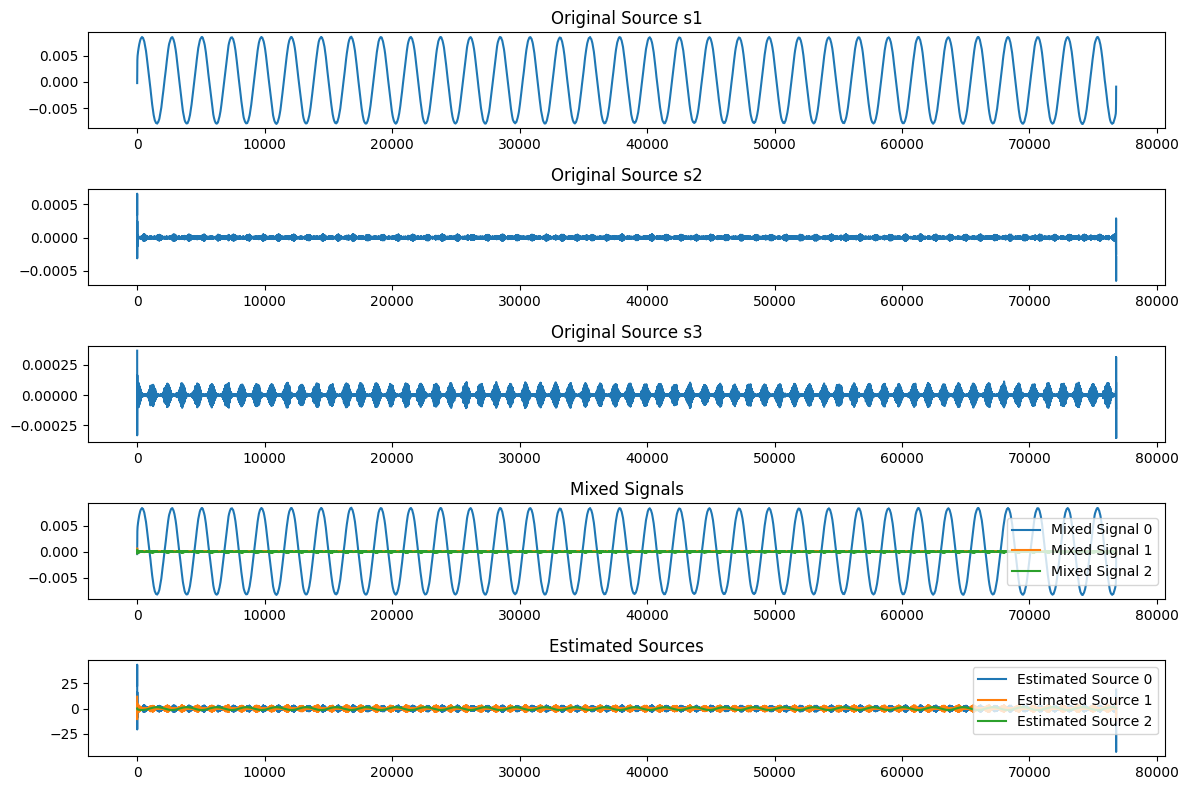

Estimated Mixing Matrix (A_est):
[[-1.45506004e-10+0.j -7.80702320e-11+0.j -5.85458548e-03+0.j]
 [ 1.51621696e-05+0.j  1.90259335e-07+0.j -5.62723439e-08+0.j]
 [-9.28329697e-08+0.j  3.10745666e-05+0.j -1.43642392e-08+0.j]]


(array([[-1.45506004e-10+0.j, -7.80702320e-11+0.j, -5.85458548e-03+0.j],
        [ 1.51621696e-05+0.j,  1.90259335e-07+0.j, -5.62723439e-08+0.j],
        [-9.28329697e-08+0.j,  3.10745666e-05+0.j, -1.43642392e-08+0.j]]),
 array([[ 2.30573377e+01+0.j,  4.36135268e+01+0.j,  2.94145107e+01+0.j,
         ..., -3.23058360e+01+0.j, -4.30210777e+01+0.j,
         -1.92381293e+01+0.j],
        [ 1.18541650e+01+0.j,  3.24706419e+00+0.j, -1.05765660e+01+0.j,
         ...,  1.00146413e+01+0.j, -3.64657763e+00+0.j,
         -1.14099942e+01+0.j],
        [ 7.46150840e-02+0.j, -3.09985529e-02+0.j, -1.24503920e-01+0.j,
         ...,  3.91514714e-01+0.j,  2.97248279e-01+0.j,
          1.90972060e-01+0.j]]))

In [ ]:
from separations import separation
separation(name="jad",sig=u_votre_signal)

## l'analyse en composantes indépendantes FastICA

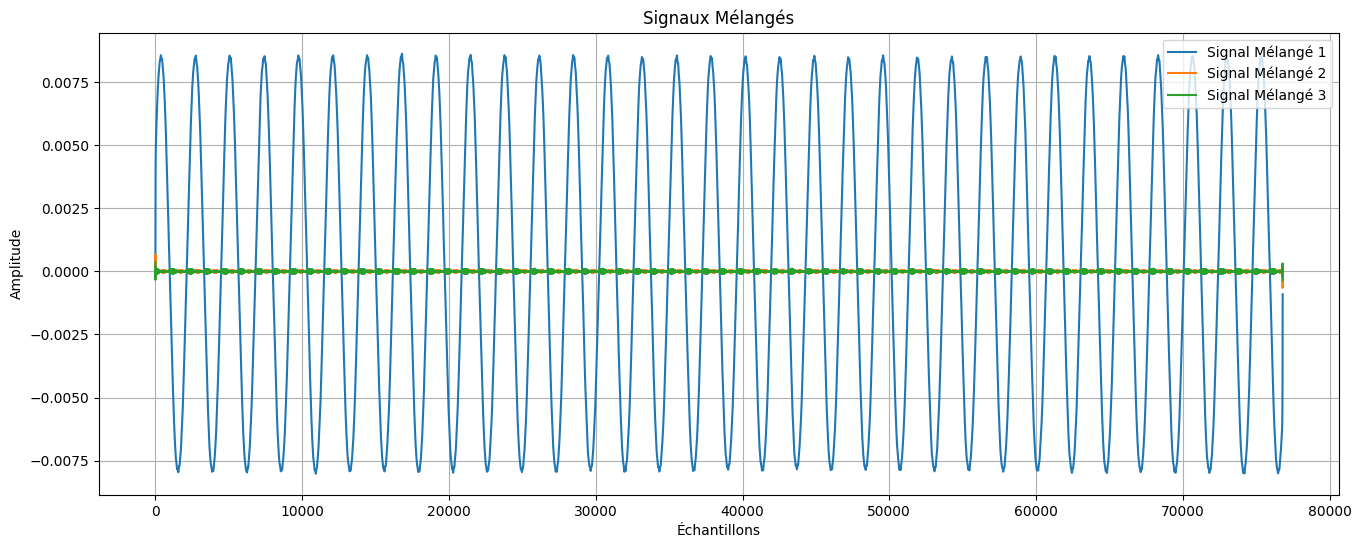

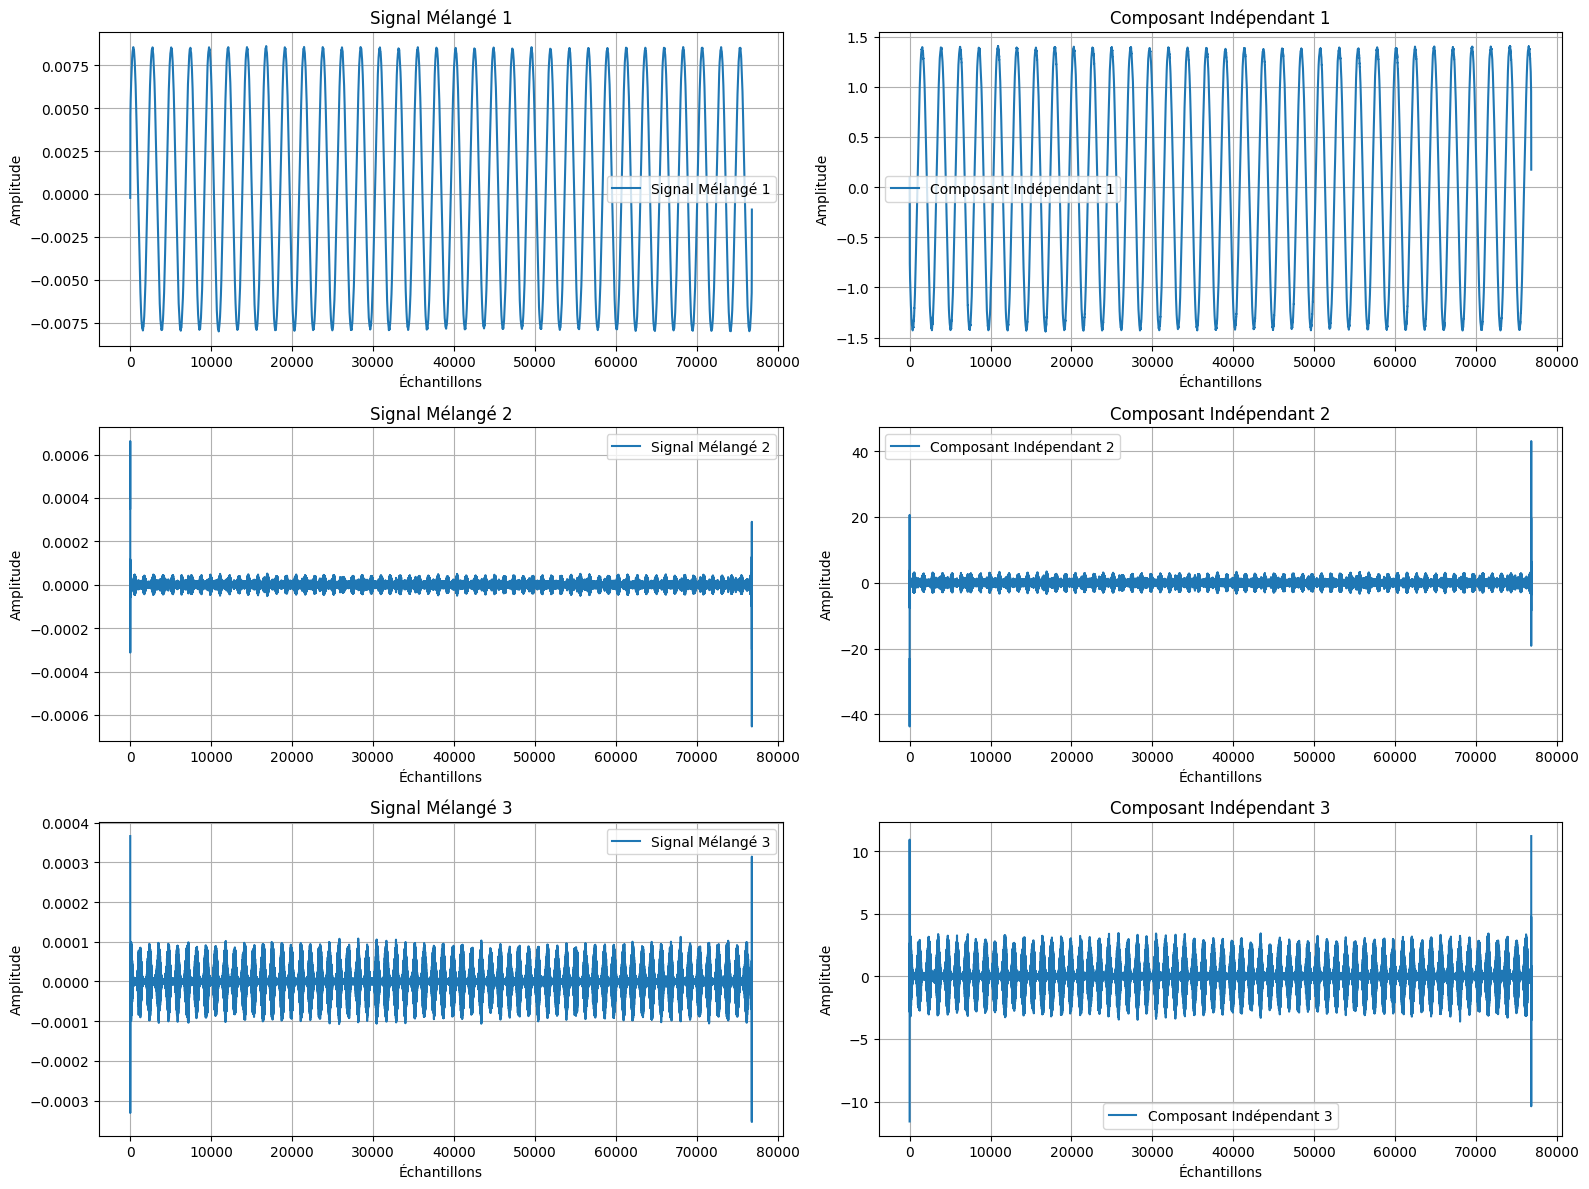

In [ ]:
separation(name="ica",sig=u_votre_signal)

In [ ]:
import importlib
import wiener_filtre
import filtres
importlib.reload(wiener_filtre)
importlib.reload(filtres)

<module 'filtres' from '/content/drive/MyDrive/traitement_signaux/functions/filtres.py'>

# Methode de soustraction
$$
faultExtracted = faultSignal -  healthySignal
$$

# Relation RMSE

La racine de l'erreur quadratique moyenne (RMSE) est définie par la formule suivante :

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2}
$$

où :
- \( y_i \) est la valeur réelle (observée) pour la \( i \)-ème observation,
- \( \hat{y}_i \) est la valeur prédite pour la \( i \)-ème observation,
- \( n \) est le nombre total d'observations.


76800
76800


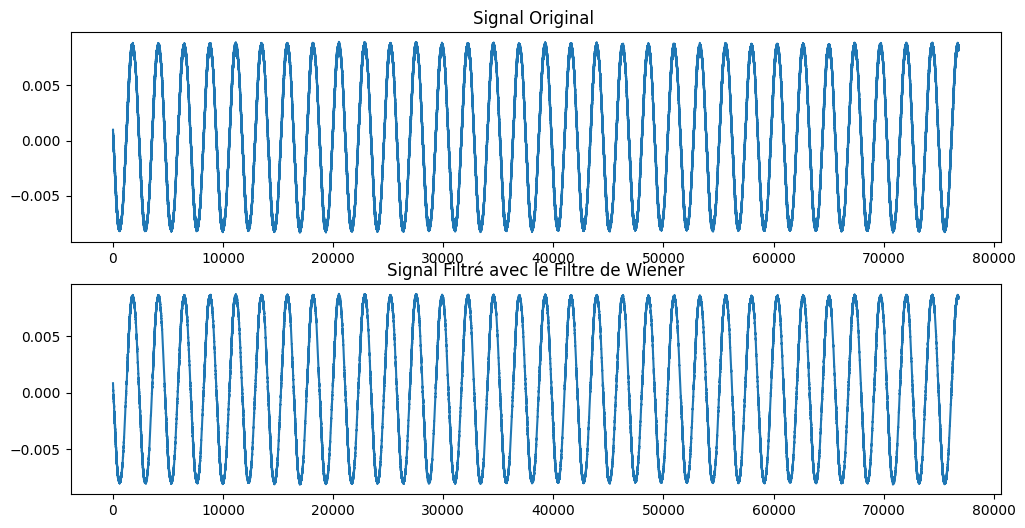

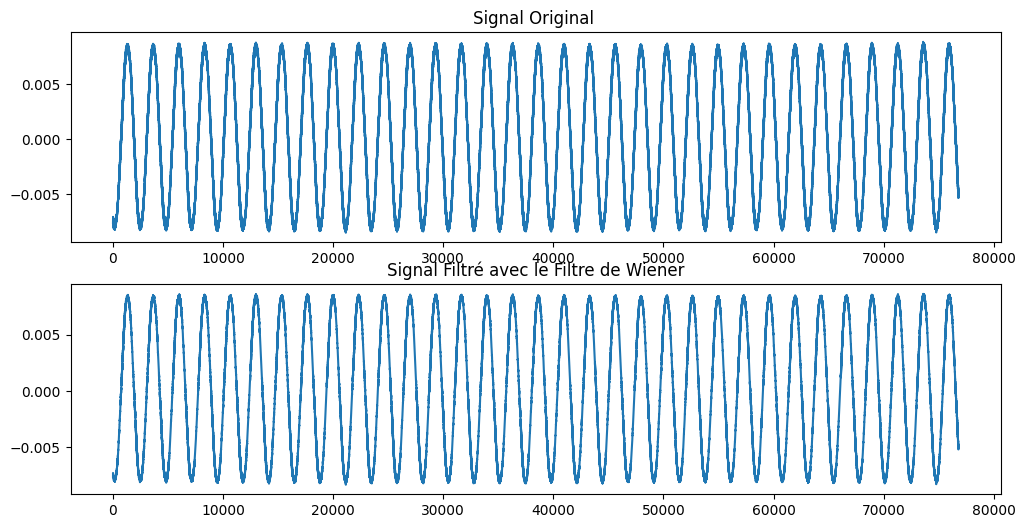

In [ ]:
fault_signal = filtre("wiener","CE_fault_035.csv","cur_1")
healthy_signal = filtre("wiener","C_healthy_035.csv","cur_1")

Erreur Quadratique Moyenne (RMSE): 0.0086


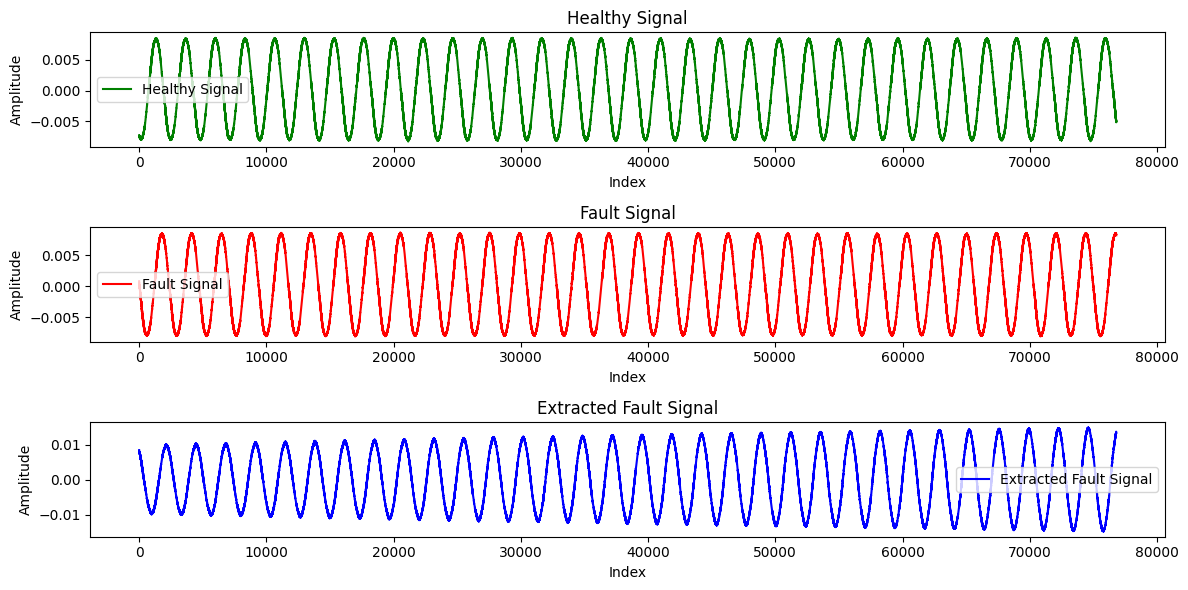

In [ ]:
# Soustraction pour extraire le signal de défaut


fault_extracted = fault_signal - healthy_signal

# Calcul de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(np.mean((fault_signal - healthy_signal) ** 2))
print(f'Erreur Quadratique Moyenne (RMSE): {rmse:.4f}')



# Affichage des signaux
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(healthy_signal, label='Healthy Signal', color='g')
plt.title('Healthy Signal')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(fault_signal, label='Fault Signal', color='r')
plt.title('Fault Signal')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(fault_extracted, label='Extracted Fault Signal', color='b')
plt.title('Extracted Fault Signal')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()